In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pybaseball as pyb
from pybaseball import playerid_lookup

data = pyb.statcast(start_dt = '2015-04-01', end_dt = '2022-09-30')

This is a large query, it may take a moment to complete
Skipping offseason dates
Skipping offseason dates
Skipping offseason dates
Skipping offseason dates
Skipping offseason dates
Skipping offseason dates
Skipping offseason dates
Skipping offseason dates


100%|██████████| 1621/1621 [01:21<00:00, 19.80it/s]


In [21]:
jd = playerid_lookup("martinez","j. d.", fuzzy = True)['key_mlbam'][0]

In [22]:
jd = data[data['batter'] == jd]    


In [23]:
jd

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
3094,FF,2022-04-26,98.2,-1.42,6.41,"Romano, Jordan",502110,605447,strikeout,swinging_strike,...,5,5,5,5,5,Standard,Standard,195,0.124,-0.203
3246,FF,2022-04-26,98.2,-1.47,6.33,"Romano, Jordan",502110,605447,None,foul,...,5,5,5,5,5,Standard,Standard,198,0.0,0.0
3426,FF,2022-04-26,98.6,-1.53,6.28,"Romano, Jordan",502110,605447,None,swinging_strike,...,5,5,5,5,5,Standard,Standard,194,0.0,-0.123
3507,FF,2022-04-26,97.6,-1.58,6.32,"Romano, Jordan",502110,605447,None,swinging_strike,...,5,5,5,5,5,Standard,Strategic,199,0.0,-0.029
4376,KC,2022-04-26,80.0,-2.53,6.22,"Phelps, David",502110,475479,field_out,hit_into_play,...,2,4,2,4,2,Strategic,Strategic,33,0.016,-0.335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,FF,2015-04-06,92.1,-3.04,5.73,"Hughes, Phil",502110,461833,strikeout,swinging_strike,...,0,0,3,3,0,Standard,Standard,<NA>,-0.005,-0.06
1294,FF,2015-04-06,91.3,-3.0,5.79,"Hughes, Phil",502110,461833,None,swinging_strike,...,0,0,3,3,0,Standard,Standard,<NA>,0.0,-0.022
1306,FF,2015-04-06,91.2,-3.03,5.73,"Hughes, Phil",502110,461833,None,called_strike,...,0,0,3,3,0,Standard,Strategic,<NA>,0.0,-0.016
2544,FF,2015-04-06,89.1,-3.01,5.63,"Hughes, Phil",502110,461833,home_run,hit_into_play,...,0,0,1,1,0,Standard,Standard,<NA>,0.11,1.032


In [24]:
bip = jd[jd['description'] == 'hit_into_play']

In [25]:
bip = bip.replace('single', 1)
bip = bip.replace('double', 2)
bip = bip.replace('triple', 3)
bip = bip.replace('home_run', 4)
bip = bip.replace('field_out', -1)
bip = bip.replace('force_out', -1)
bip = bip.replace('fielders_choice_out', -1)
bip = bip.replace('sac_bunt', -1)
bip = bip.replace('grounded_into_double_play', -2)
bip = bip.replace('double_play', -2)
bip = bip.replace('sac_fly', -1)
bip = bip.replace('field_error', 0)
bip = bip.replace('catcher_interf', 0)
bip = bip.replace('fielders_choice', -1)
bip = bip.replace('sac_fly_double_play', -2)
bip = bip.replace('sac_bunt_double_play', -2)
bip = bip.replace('triple_play', -3)
bip = bip.dropna(subset = ['if_fielding_alignment'])
bip.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
4376,KC,2022-04-26,80.0,-2.53,6.22,"Phelps, David",502110,475479,-1,hit_into_play,...,2,4,2,4,2,Strategic,Strategic,33,0.016,-0.335
122,FF,2022-04-26,95.8,-2.37,6.01,"Gausman, Kevin",502110,592332,-1,hit_into_play,...,2,1,2,1,2,Strategic,Standard,217,0.038,-0.207
2737,SL,2022-04-26,84.4,-2.5,6.12,"Gausman, Kevin",502110,592332,2,hit_into_play,...,0,0,0,0,0,Infield shift,Standard,130,-0.064,0.633
579,CU,2022-04-25,82.9,-3.25,5.38,"Berríos, José",502110,621244,-1,hit_into_play,...,0,0,0,0,0,Standard,Standard,44,0.037,-0.346
1122,FF,2022-04-25,93.3,-2.97,5.49,"Berríos, José",502110,621244,2,hit_into_play,...,0,0,0,0,0,Infield shift,Strategic,227,-0.043,0.463


In [34]:
def create_visual(df, x, y , z,aggfunc = 'mean', title = 'Heat Map'):
    bip_2 = df[[x,y,z]]
    bip_2 = bip_2.dropna()
    bip_2 = bip_2.pivot_table(index=x, columns=y, values=z, aggfunc=aggfunc)
    ax = sns.heatmap(bip_2)
    ax.set_title(title)


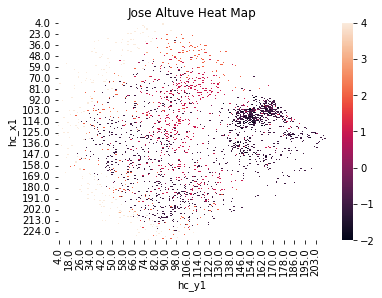

In [36]:
bip['hc_x1'] = bip['hc_x'].round()
bip['hc_y1'] = bip['hc_y'].round()
create_visual(bip, 'hc_x1', 'hc_y1', 'events',title='Jose Altuve Heat Map')